In [1]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
from google.colab import files  # чтобы загружать файлы в облако через проводник 

import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека MatPlotLib для визуализации
import seaborn as sns; sns.set() # библиотека Seaborn для визуализации данных из Pandas
import json

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
uploaded = files.upload() #просто запускаем и выбираем файл в проводнике

Saving CleanSubmissionsWithForms.json to CleanSubmissionsWithForms.json


In [4]:
df = pd.read_json('/content/CleanSubmissionsWithForms.json')

### Dataset cleanup

In [5]:
df.head(15)

,id,SubmissionLikes,Category,Description,Participation,Money,Age,ContactName,LiveTime,FeatureType,GeometryType,CoordinatesLongitude,CoordinatesLatitude,CreatedAt,Gender
0,7,67,"Общественные пространства, природа и экология","Благоустроить Силинский лес: освещение, дорожк...",Нет,Пока не знаю,40-65,Лариса,С рождения,Feature,Point,0.000000,0.000000,2023-03-06T09:38:48.587Z,f
1,8,61,"Общественные пространства, природа и экология",Благоустроить Силинский лес,Нет,Пока не знаю,40-65,Лариса,С рождения,Feature,Point,137.041787,50.572570,2023-03-06T09:40:23.085Z,f
2,9,109,Дороги и транспорт,Здание автовокзала требует колоссальной реконс...,Нет,Бюджетные,25-40,Олег,Более 5 лет,Feature,Point,137.031797,50.533640,2023-03-06T09:54:31.566Z,m
3,10,44,"Общественные пространства, природа и экология","Ремонтируют парк очень плохо, страшно коляской...",Нет,Бюджетные,До 25,ОльгаЛ,С рождения,Feature,Point,137.026578,50.543906,2023-03-06T10:07:14.739Z,None
4,11,185,"Здоровье, образование, спорт и культура",Реконструкция ДК Судостроитель,Нет,Бюджетные,25-40,Александра,"Жил, но уехал",Feature,Point,137.022575,50.542521,2023-03-15T07:08:22.533Z,f
5,12,116,"Общественные пространства, природа и экология",привести в современное состояние парки города...,Да,Пока не знаю,40-65,Елена,С рождения,Feature,Point,0.000000,0.000000,2023-03-15T07:23:58.030Z,f
6,13,123,Дороги и транспорт,Возрождение муниципального транспорта-автобусы...,Нет,Бюджетные,40-65,СЕРГЕЙ,Более 5 лет,Feature,Point,0.000000,0.000000,2023-03-15T07:27:43.646Z,m
7,14,152,Дороги и транспорт,Восстановить нормальную работу Комсомольского ...,Нет,Бюджетные,40-65,Елена,С рождения,Feature,Point,136.935375,50.406823,2023-03-15T07:38:16.299Z,f
8,15,101,"Здоровье, образование, спорт и культура",Предлагаю провести реконструкцию одной из глав...,Нет,Бюджетные,25-40,Сергей,С рождения,Feature,Point,0.000000,0.000000,2023-03-15T08:08:30.840Z,m
9,16,137,Дороги и транспорт,"Учитывая, что у нас в городе с очисткой дорог...",Да,Бюджетные,40-65,Игорь,Более 5 лет,Feature,Point,0.000000,0.000000,2023-03-16T00:29:34.708Z,m


In [6]:
df['SubmissionLikes'].sum()

4514

In [7]:
df['Age'].value_counts()

25-40       76
40-65       56
До 25       11
Более 65     2
Name: Age, dtype: int64

In [8]:
def get_mean_age(age_str):
    if age_str == 'До 25':
        return 24
    if age_str == 'Более 65':
        return 66
    if age_str == '25-40':
        return 32.5
    if age_str == '40-65':
        return 52.5

In [9]:
df['MeanAge'] = df['Age'].apply(get_mean_age)

In [10]:
df['MeanAge'].value_counts()

32.5    76
52.5    56
24.0    11
66.0     2
Name: MeanAge, dtype: int64

### Mean age of survey - 40.04

In [11]:
df['MeanAge'].mean()

40.04137931034483

In [13]:
def convert_age_to_int(age_str):
    if age_str == 'До 25':
        return (None, 24)
    if age_str == 'Более 65':
        return (66, None)
    bounds = age_str.split('-')
    return (int(bounds[0]), int(bounds[1]))

In [14]:
df[['LowerAge', 'UpperAge']] = df['Age'].apply(convert_age_to_int).apply(pd.Series)

In [15]:
df['LiveTime'].value_counts()

С рождения          108
Более 5 лет          21
Жил, но уехал        11
Менее 5 лет           3
Я здесь временно      2
Name: LiveTime, dtype: int64

In [16]:
def map_livetime(value, default):
    if value == 'С рождения':
        return default
    if value == 'Более 5 лет':
        return 10
    if value == 'Жил, но уехал':
        return 1
    if value == 'Менее 5 лет':
        return 5
    if value == 'Я здесь временно':
        return 1

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    145 non-null    int64  
 1   SubmissionLikes       145 non-null    int64  
 2   Category              145 non-null    object 
 3   Description           145 non-null    object 
 4   Participation         145 non-null    object 
 5   Money                 145 non-null    object 
 6   Age                   145 non-null    object 
 7   ContactName           145 non-null    object 
 8   LiveTime              145 non-null    object 
 9   FeatureType           145 non-null    object 
 10  GeometryType          145 non-null    object 
 11  CoordinatesLongitude  145 non-null    float64
 12  CoordinatesLatitude   145 non-null    float64
 13  CreatedAt             145 non-null    object 
 14  Gender                143 non-null    object 
 15  MeanAge               1

In [18]:
# df['LiveTimeInt'] = df['LiveTime'].apply(map_livetime)
df['LiveTimeInt'] = df.apply(lambda row: map_livetime(row['LiveTime'], row['MeanAge']), axis=1)

In [19]:
df['LiveTimeInt'].value_counts()

32.5    62
52.5    36
10.0    21
1.0     13
24.0     9
5.0      3
66.0     1
Name: LiveTimeInt, dtype: int64

In [20]:
def convert_participation_to_bool(value):
    if value == "Да":
        return True
    return False

In [21]:
df['Participation'] = df['Participation'].apply(convert_participation_to_bool)

In [22]:
df.head()

,id,SubmissionLikes,Category,Description,Participation,Money,Age,ContactName,LiveTime,FeatureType,GeometryType,CoordinatesLongitude,CoordinatesLatitude,CreatedAt,Gender,MeanAge,LowerAge,UpperAge,LiveTimeInt
0,7,67,"Общественные пространства, природа и экология","Благоустроить Силинский лес: освещение, дорожк...",False,Пока не знаю,40-65,Лариса,С рождения,Feature,Point,0.000000,0.000000,2023-03-06T09:38:48.587Z,f,52.5,40.0,65.0,52.5
1,8,61,"Общественные пространства, природа и экология",Благоустроить Силинский лес,False,Пока не знаю,40-65,Лариса,С рождения,Feature,Point,137.041787,50.572570,2023-03-06T09:40:23.085Z,f,52.5,40.0,65.0,52.5
2,9,109,Дороги и транспорт,Здание автовокзала требует колоссальной реконс...,False,Бюджетные,25-40,Олег,Более 5 лет,Feature,Point,137.031797,50.533640,2023-03-06T09:54:31.566Z,m,32.5,25.0,40.0,10.0
3,10,44,"Общественные пространства, природа и экология","Ремонтируют парк очень плохо, страшно коляской...",False,Бюджетные,До 25,ОльгаЛ,С рождения,Feature,Point,137.026578,50.543906,2023-03-06T10:07:14.739Z,None,24.0,NaN,24.0,24.0
4,11,185,"Здоровье, образование, спорт и культура",Реконструкция ДК Судостроитель,False,Бюджетные,25-40,Александра,"Жил, но уехал",Feature,Point,137.022575,50.542521,2023-03-15T07:08:22.533Z,f,32.5,25.0,40.0,1.0


### check if data was not lost

In [23]:
df.shape

(145, 19)

In [24]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.0 MB/s eta 0:00:00


In [25]:
import nltk
from transformers import pipeline

# Download the necessary NLTK packages
nltk.download('punkt')
nltk.download('stopwords')

# Load the pre-trained sentiment analysis model
MODEL = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Analyze a Russian comment
# comment = "Замечательный фильм! Очень трогательный и увлекательный!"
# result = model(comment)[0]
# print(f"Comment: {comment}\nSentiment: {result['label']} ({result['score']})")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
def calculate_happy(input):
    try:
        result = MODEL(input)[0]
    except Exception as e:
        # just put average if something goes wrong
        return 3
    return int(result['label'].split(' ')[0])

In [27]:
df['Happy'] = df['Description'].apply(calculate_happy)

Token indices sequence length is longer than the specified maximum sequence length for this model (634 > 512). Running this sequence through the model will result in indexing errors


In [29]:
import seaborn as sns

## How happy are the people in counts

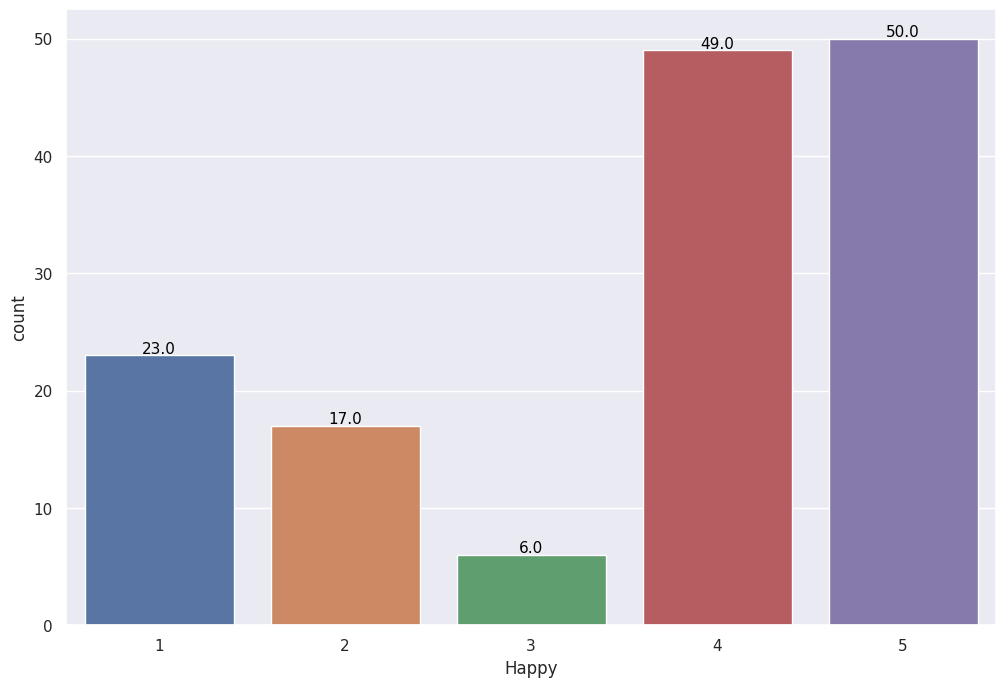

In [56]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(x=df['Happy'])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

## How happy are the people in percentages

In [42]:
percentile_happy_str = df.Happy.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
percentile_happy_int = df.Happy.value_counts(normalize=True).mul(100).round(1).astype(int)
display(percentile_happy_str)

5    34.5%
4    33.8%
1    15.9%
2    11.7%
3     4.1%
Name: Happy, dtype: object

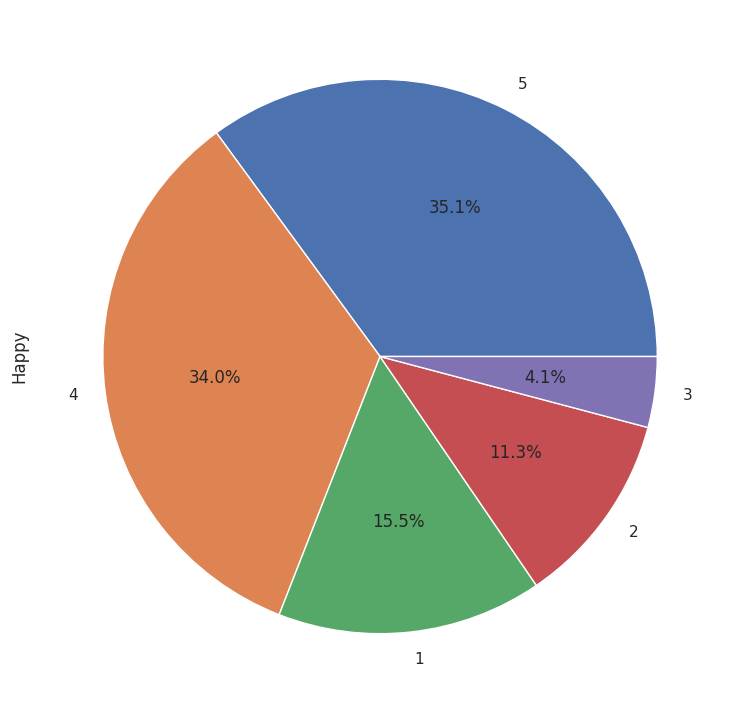

In [43]:
plt.figure(figsize=(15, 9))
percentile_happy_int.plot(kind='pie', autopct='%1.1f%%')
plt.show()

# **Satisfaction percentage is 71.86%**

In [44]:
# average satisfaction of the people is 3.59 about/proportional that is 71.8%
df['Happy'].mean() * 20

71.86206896551724

## Category *analysis*

In [45]:
df['Category'].value_counts().sort_values(ascending=False)

Общественные пространства, природа и экология    45
Дороги и транспорт                               34
Здоровье, образование, спорт и культура          26
Жилые дома и дворы                               19
Другое                                           16
Производство, торговля и услуги                   3
Инженерные системы города                         2
Name: Category, dtype: int64

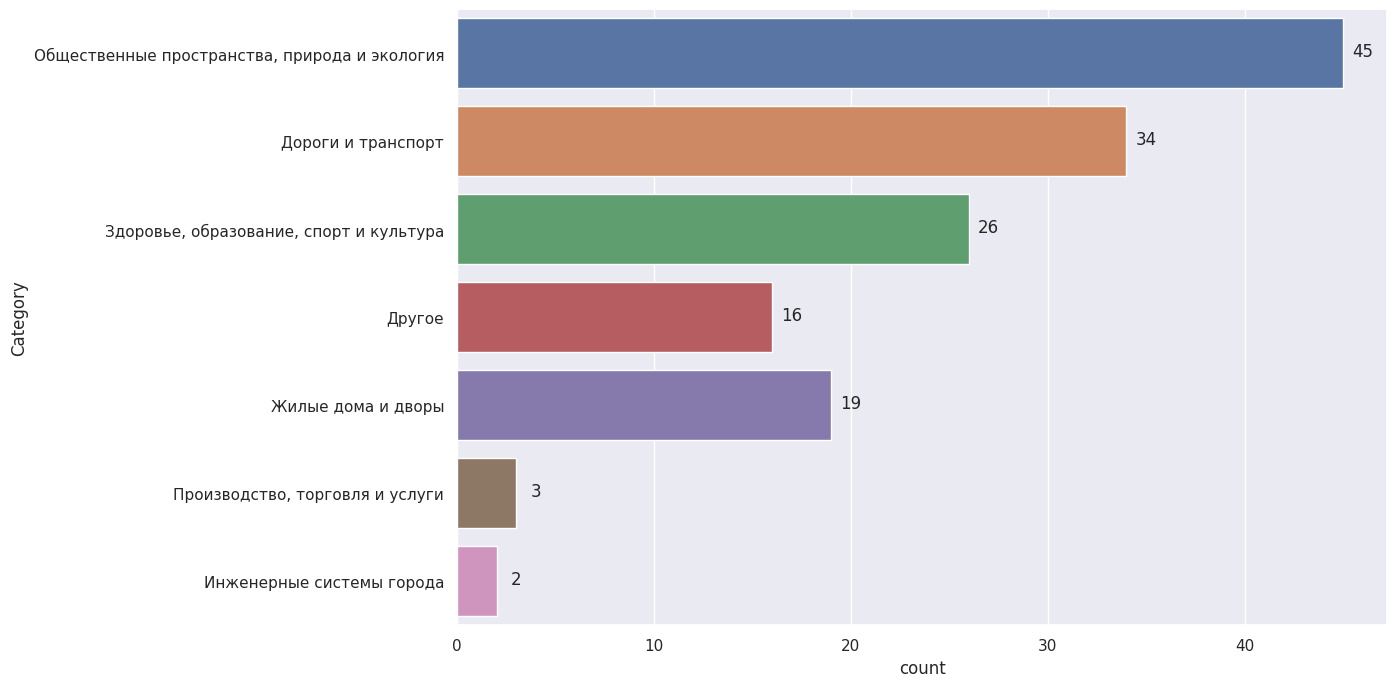

In [46]:
plt.figure(figsize=(12,8))
ax = sns.countplot(y="Category", data=df)
for p in ax.patches:
    ax.annotate(
        format(p.get_width(), '.0f'),
        (p.get_width() + 1, p.get_y() + p.get_height() / 1.5),
        ha = 'center',
        va = 'center',
        xytext = (0, 10),
        textcoords = 'offset points'
    )
plt.show()

In [47]:
percentile_category_str = df.Category.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
percentile_category_int = df.Category.value_counts(normalize=True).mul(100).round(1).astype(int)
display(percentile_category_str)

Общественные пространства, природа и экология    31.0%
Дороги и транспорт                               23.4%
Здоровье, образование, спорт и культура          17.9%
Жилые дома и дворы                               13.1%
Другое                                           11.0%
Производство, торговля и услуги                   2.1%
Инженерные системы города                         1.4%
Name: Category, dtype: object

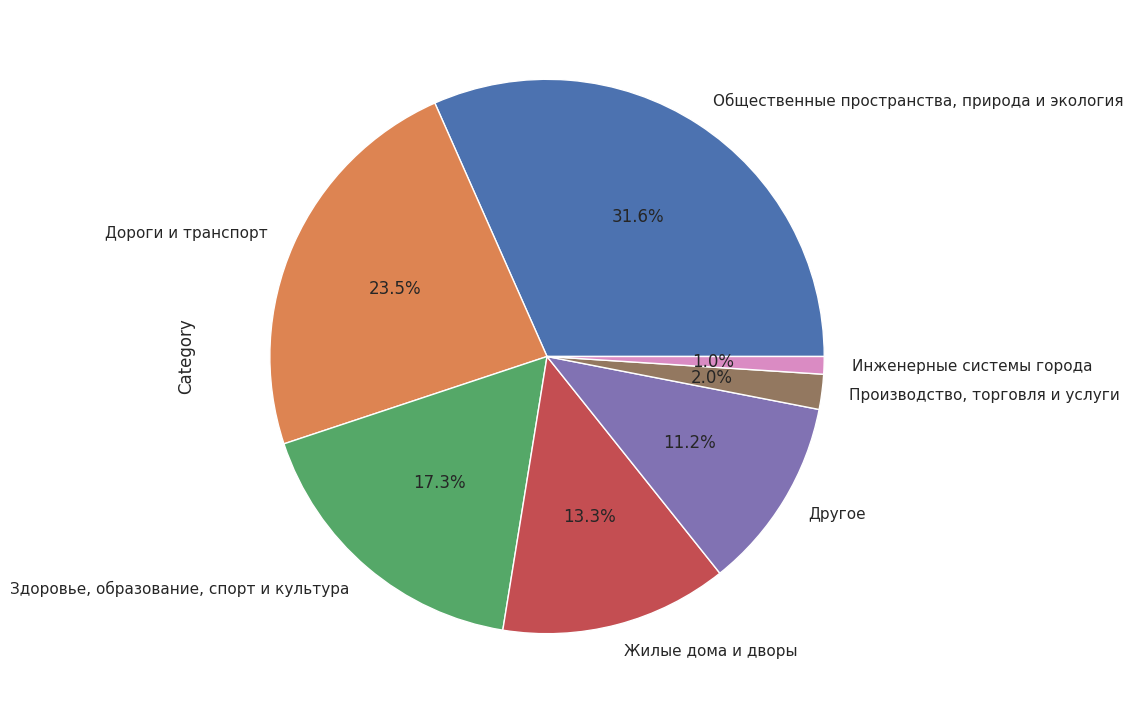

In [48]:
plt.figure(figsize=(15, 9))
percentile_category_int.plot(kind='pie', autopct='%1.1f%%')
plt.show()

### 10 Most relevant comments

In [49]:
ten_most_popular = df.nlargest(10, 'SubmissionLikes')

In [50]:
ten_most_popular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 4 to 8
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10 non-null     int64  
 1   SubmissionLikes       10 non-null     int64  
 2   Category              10 non-null     object 
 3   Description           10 non-null     object 
 4   Participation         10 non-null     bool   
 5   Money                 10 non-null     object 
 6   Age                   10 non-null     object 
 7   ContactName           10 non-null     object 
 8   LiveTime              10 non-null     object 
 9   FeatureType           10 non-null     object 
 10  GeometryType          10 non-null     object 
 11  CoordinatesLongitude  10 non-null     float64
 12  CoordinatesLatitude   10 non-null     float64
 13  CreatedAt             10 non-null     object 
 14  Gender                10 non-null     object 
 15  MeanAge               10 n

In [51]:
display(ten_most_popular[['Description', 'SubmissionLikes', 'Category', 'Money', 'Happy']])

,Description,SubmissionLikes,Category,Money,Happy
4,Реконструкция ДК Судостроитель,185,"Здоровье, образование, спорт и культура",Бюджетные,5
17,Предлагаем в ваш проект включить автоспортивны...,166,"Здоровье, образование, спорт и культура",Частные,4
7,Восстановить нормальную работу Комсомольского ...,152,Дороги и транспорт,Бюджетные,5
9,"Учитывая, что у нас в городе с очисткой дорог...",137,Дороги и транспорт,Бюджетные,2
36,"Я хочу и даже требую, чтобы наш город ""Президе...",131,"Здоровье, образование, спорт и культура",Бюджетные,2
6,Возрождение муниципального транспорта-автобусы...,123,Дороги и транспорт,Бюджетные,5
5,привести в современное состояние парки города...,116,"Общественные пространства, природа и экология",Пока не знаю,5
2,Здание автовокзала требует колоссальной реконс...,109,Дороги и транспорт,Бюджетные,4
20,"Штрафовать за выгул собак по всему городу, вес...",108,"Общественные пространства, природа и экология",Бюджетные,1
8,Предлагаю провести реконструкцию одной из глав...,101,"Здоровье, образование, спорт и культура",Бюджетные,2


In [52]:
from IPython.display import display, HTML

columns = ['Description', 'SubmissionLikes', 'Category', 'Money', 'Happy']

ten_most_popular[columns].iloc[0]
for i in range(10):
    l = ten_most_popular[columns].iloc[i].tolist()
    comment_content = l[0]
    comment_likes = l[1]
    comment_category = l[2]
    comment_money = l[3]
    comment_happy = l[4]
    if not all([comment_content, comment_likes, comment_category, comment_money, comment_happy]):
        continue
    display(HTML(f"<h2>{i+1}. Likes: {comment_likes} Category: {comment_category} Funding: {comment_money} Happy: {comment_happy}</h2>"))
    display(HTML(f"<p style='font-size:16px'>{comment_content}<br><br>"))

## Money

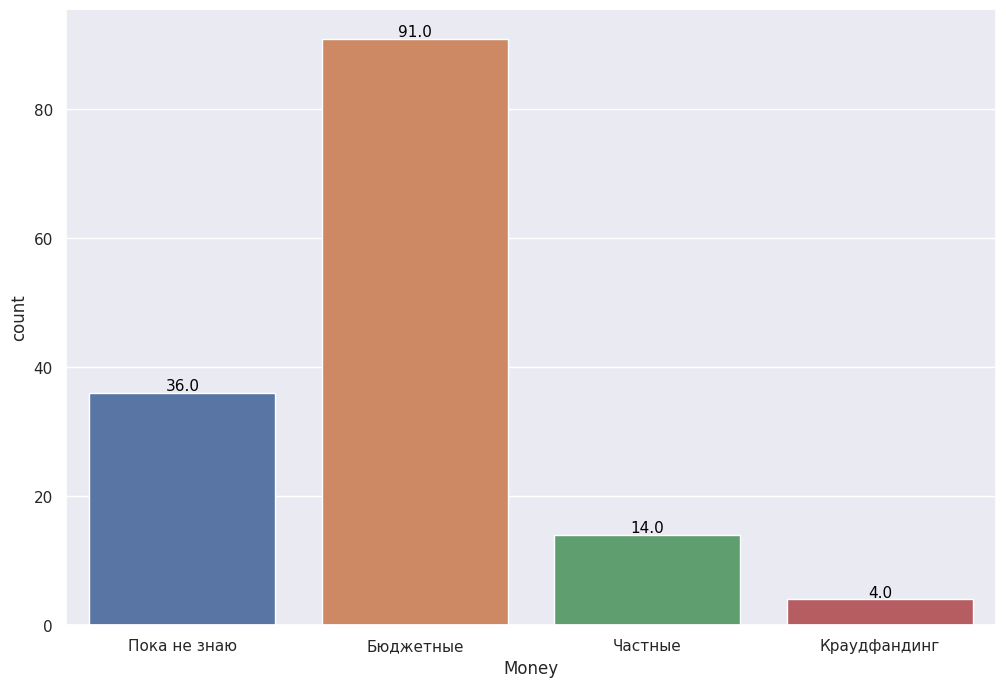

In [55]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x=df['Money'])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

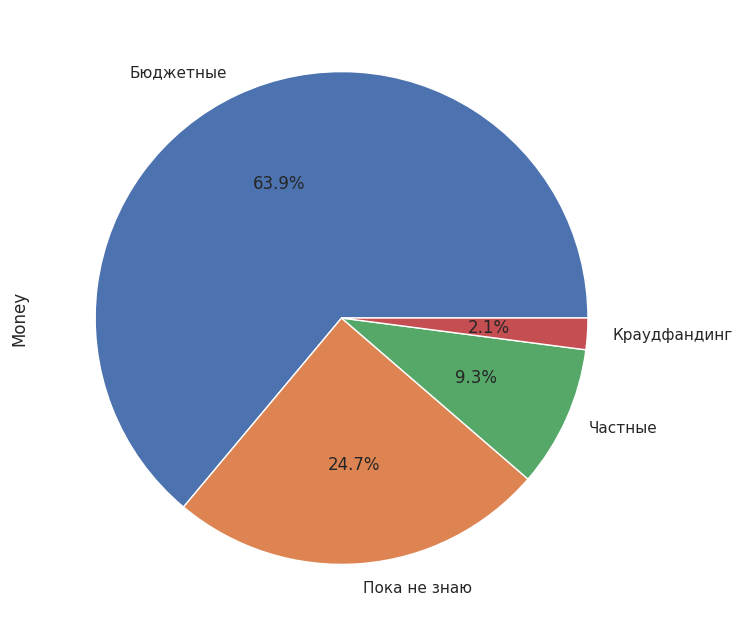

In [57]:
percentile_money_int = df.Money.value_counts(normalize=True).mul(100).round(1).astype(int)
plt.figure(figsize=(12, 8))
percentile_money_int.plot(kind='pie', autopct='%1.1f%%')
plt.show()

## Participation

In [ ]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(x=df['Participation'])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
df.info()

In [ ]:
df['Gender'].value_counts()

m    79
f    61
u     2
-     1
Name: Gender, dtype: int64

In [ ]:
df.at[3, 'Gender'] = 'f'
df.at[31, 'Gender'] = 'm'
df.at[82, 'Gender'] = 'f'
df.at[83, 'Gender'] = 'm'
df.at[92, 'Gender'] = 'm'

In [ ]:
df['Gender'].value_counts()

m    82
f    63
Name: Gender, dtype: int64

In [ ]:
df['Gender'] = df['Gender'].apply(lambda x: 'Female' if x == 'f' else 'Male')

Gender
Female    52.380952
Male      42.682927
Name: Participation, dtype: float64

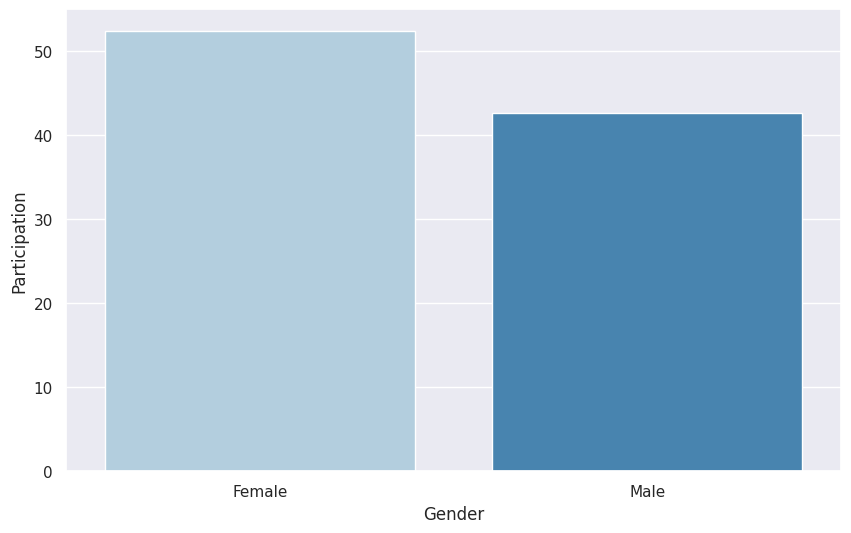

In [ ]:
plt.figure(figsize=(10, 6))
result = df.groupby('Gender')['Participation'].mean() * 100
display(result)
sns.barplot(x=result.index, y=result, palette='Blues')
plt.show()

In [ ]:
df.groupby('Gender')['Participation'].value_counts()

Gender  Participation
Female  True             33
        False            30
Male    False            47
        True             35
Name: Participation, dtype: int64

## Native

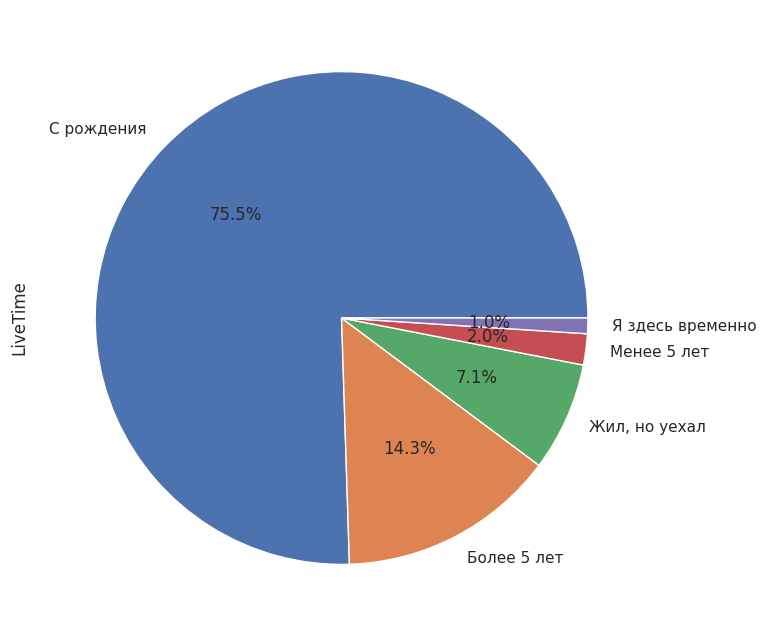

In [ ]:
percentile_live_int = df.LiveTime.value_counts(normalize=True).mul(100).round(1).astype(int)
plt.figure(figsize=(12, 8))
percentile_live_int.plot(kind='pie', autopct='%1.1f%%')
plt.show()

## Correlation between volunteer and living

In [ ]:
corr = df['Participation'].corr(df['LiveTimeInt'])
corr

0.09064063376564829

## Correlation matrix

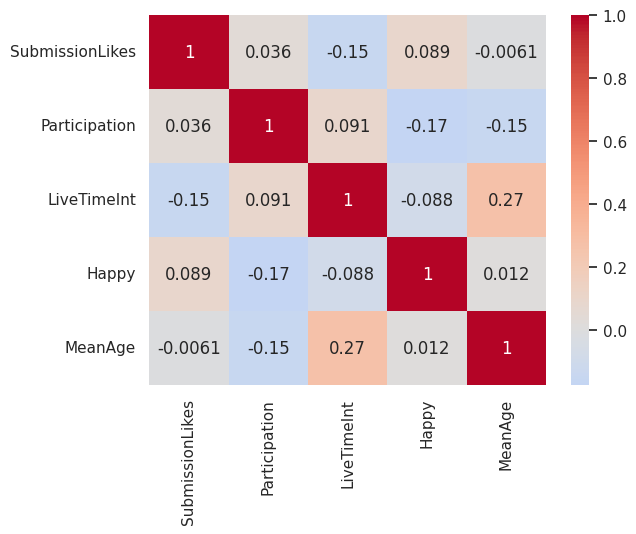

In [ ]:
df_subset = df[['SubmissionLikes', 'Participation', 'LiveTimeInt', 'Happy', 'MeanAge']]
corr_matrix = df_subset.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html /content/KomsomolskOnAmurCommentAnalysis.ipynb

[NbConvertApp] Converting notebook /content/KomsomolskOnAmurCommentAnalysis.ipynb to html
[NbConvertApp] Writing 1170226 bytes to /content/KomsomolskOnAmurCommentAnalysis.html
